In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [3]:
#convert COCO annotations into a CSV file
f = r"/Users/rowanconverse/Library/CloudStorage/OneDrive-UniversityofNewMexico/CV4Ecology/Prototyping/Data/Labels/train/train.json"
with open(f, encoding='utf-8') as inputfile:
    df = pd.read_json(inputfile)

df.to_csv('train.csv', encoding='utf-8', index=False)

coco = pd.read_csv('train.csv')

In [8]:
df

,annotation_id,bbox,area,category_id,category,image_id,filename,labeler_id
0,33371,"[10.142149925231934, 447.7699279785156, 99.093...",6412.766191,1,Duck,6130,BDA_unknown_20181106_1_00040_02_07.png,756
1,642865,"[443.8125, 358, 105, 61]",6405.000000,1,Duck,18082,BDA_18a4_20181106_3_00794_05_05.png,626
2,861813,"[333.8046875, 170, 72, 64.5]",4644.000000,1,Duck,20991,BDA_12c_20181113_2_00856_06_08.png,4053
3,327172,"[115.8125, 402, 38, 54]",2052.000000,1,Duck,8054,BDA_12c_20181113_2_00709_05_04.png,2392
4,201950,"[455.6737976074219, 472.1651306152344, 49.7771...",2191.871956,1,Duck,19942,BDA_18a4_20181106_1_00240_03_03.png,1427
...,...,...,...,...,...,...,...,...
686263,587485,"[53.633331298828125, 2.600006103515625, 90, 90]",8100.000000,1,Duck,18171,BDA_18a4_20181106_3_00811_01_03.png,924
686264,164769,"[590.8125, 3, 92, 56]",5152.000000,1,Duck,15703,BDA_18a4_20181106_3_00579_01_06.png,254
686265,424074,"[-5.796875, 230, 81, 45]",3645.000000,1,Duck,9969,BDA_18a4_20181106_3_00750_03_07.png,2588
686266,30334,"[227.37335205078125, 3.06640625, 109.130310058...",4612.227634,1,Duck,5548,BDA_unknown_20181106_1_00094_02_07.png,673


In [8]:
from pybboxes import BoundingBox

box0 = df.bbox[3100]
coco_bbox = BoundingBox.from_coco(*box0)  # <[98 345 322 117] (322x117) | Image: (?x?)>
voc_bbox = coco_bbox.to_voc()  # <[98 345 420 462] (322x117) | Image: (?x?)>
voc_bbox_values = coco_bbox.to_voc(return_values=True)  # (98, 345, 420, 462)
print(box0)
print(voc_bbox)
print(voc_bbox_values)

[653.2301635742188, 445.458984375, 32.279296875, 59.492919921875]
<[653 445 686 505] (33x60) | Image: (?x?)>
(653.2301635742188, 445.458984375, 685.5094604492188, 504.951904296875)


In [21]:
#ASK FOR HELP ON THIS IN THE AFTERNOON TOMORROW
from pybboxes import BoundingBox

bboxes, filenames, cats = df["bbox"].to_list(), df["filename"].to_list(), df["category"].to_list()
vocboxes = []
for ann in range(len(bboxes)):
    img = filenames[ann]
    bbox = bboxes[ann]
    if bbox[2] <= 1 or bbox[3] <= 1:
        continue
    try:
        coco_bbox = BoundingBox.from_coco(*bbox, strict=False)  # <[98 345 322 117] (322x117) | Image: (?x?)>
        voc_bbox = list(coco_bbox.to_voc(return_values=True))
    except:
        print("DEBUG")
        continue
    
    label = cats[ann]
    vocanno = {
    "filename": img,
    "bbox": voc_bbox,
    "label": label
    }
    vocboxes.append(vocanno)
vocboxes    

[{'filename': 'BDA_unknown_20181106_1_00040_02_07.png',
  'bbox': [10.142149925231934,
   447.7699279785156,
   109.23579406738281,
   512.484130859375],
  'label': 'Duck'},
 {'filename': 'BDA_18a4_20181106_3_00794_05_05.png',
  'bbox': [443.8125, 358, 548.8125, 419],
  'label': 'Duck'},
 {'filename': 'BDA_12c_20181113_2_00856_06_08.png',
  'bbox': [333.8046875, 170, 405.8046875, 234.5],
  'label': 'Duck'},
 {'filename': 'BDA_12c_20181113_2_00709_05_04.png',
  'bbox': [115.8125, 402, 153.8125, 456],
  'label': 'Duck'},
 {'filename': 'BDA_18a4_20181106_1_00240_03_03.png',
  'bbox': [455.6737976074219,
   472.1651306152344,
   505.45098876953125,
   516.1987915039062],
  'label': 'Duck'},
 {'filename': 'FWS_MaxwellLake13_20171215_1_00457_07_07.png',
  'bbox': [2.479281187057495,
   6.266258239746094,
   24.78668212890625,
   26.605358123779297],
  'label': 'Goose'},
 {'filename': 'BDA_unknown_20181106_1_00156_06_04.png',
  'bbox': [570.3125, 490.625, 647.3125, 539.625],
  'label': 'Duck'

In [23]:
#Save VOC boxes to csv
labelpath = r"/Users/rowanconverse/Library/CloudStorage/OneDrive-UniversityofNewMexico/CV4Ecology/Prototyping/Data/Labels/train/train.csv"

with open(labelpath, 'w') as f:
    f.write('image_path, xmin, ymin, xmax, ymax, label\n')
    for item in vocboxes:
        f.write('{}, {}, {}\n'.format(
            item["filename"],
            ', '.join([str(b) for b in item["bbox"]]),
            item["label"]
        ))
print("done")

done


In [11]:
#PATH = '/Users/rowanconverse/Library/CloudStorage/OneDrive-UniversityofNewMexico/CV4Ecology/Prototyping/Scripts/Scratch/train.csv'
IMG_ROOT = '/Users/rowanconverse/Library/CloudStorage/OneDrive-UniversityofNewMexico/CV4Ecology/Prototyping/Data/Imagery/SB597/train/'

TypeError: Image data of dtype <U159 cannot be converted to float

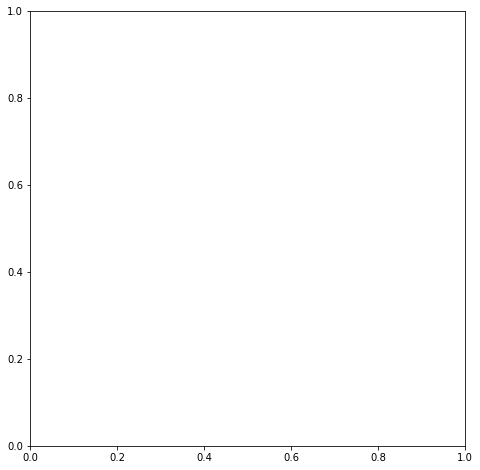

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(IMG_ROOT + "BDA_unknown_20181106_1_00040_02_07.png")
coco.showAnns(df, draw_bbox=True)
for i, ann in enumerate(df):
    ax.text(df[i]['bbox'][0], df[i]['bbox'][1], df[i]['category'], style='italic', 
            bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 5})

In [ ]:
#data = pd.read_csv(PATH, delimiter=',')

In [13]:
# Get image as numpy array
def load_image(name, path):
    img_path = path + name #+ '.png'
    img = cv2.imread(img_path)
    return img

# Plot numpy array
def plot_image(img):
    plt.imshow(img)
    plt.title(img.shape)

In [32]:
#REF: https://www.kaggle.com/code/raivokoot/plot-images-bounding-boxes-visualization
def class_to_color(class_id):
    colors = [(255,0,0),(0,255,0),(0,0,255)]
    return colors[class_id]

# draw a single bounding box onto a numpy array image
def draw_bounding_box(img, annotation):
    if annotation.isnull().values.any():
        return
    
    x_min, y_min = int(annotation['x']), int(annotation['y'])
    width, height = int(annotation['w']), int(annotation['h'])
    
    class_id = int(annotation['category_id'])
    color = class_to_color(class_id)
    
    cv2.rectangle(img,(x_min,y_min),(width,height), color, 2)

# draw all annotation bounding boxes on an image
def annotate_image(img, name, all_annotations):
    annotations = all_annotations[all_annotations['filename'] == name]
    for index, row in annotations.iterrows():
        draw_bounding_box(img, row)

In [16]:

# Plot a single sample with all its bounding boxes
name = 'BDA_unknown_20181106_1_00040_02_07.png'
img = load_image(name, IMG_ROOT)
cv2.imshow(IMG_ROOT + "BDA_unknown_20181106_1_00040_02_07.png")
plot_image(img)
#fig, ax = plt.subplots(figsize=(10, 8))

#coco.showAnns(df, draw_bbox=True)

#for i in row1:
#    [x,y,w,h] = i['bbox']
#bound = cv2.rectangle(img, (int(x), int(y)), ((int(x+w), int(y+h)), (255,0,0), 5))
#cv2.imshow(bound, img)
#plt.show()
plot_image(img)

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
